In [10]:
# read the data
import pandas as pd
import numpy as np

# File path
file_path = r"C:\Users\HP\Desktop\TrainDataset2024.xlsx"

# Read file
data = pd.read_excel(file_path)

# Display the first 5 rows 
print(data.head())

          ID  pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  \
0  TRG002174              1                          144.0  41.0   0    0   
1  TRG002178              0                          142.0  39.0   1    1   
2  TRG002204              1                          135.0  31.0   0    0   
3  TRG002206              0                           12.0  35.0   0    0   
4  TRG002210              0                          109.0  61.0   1    0   

   HER2  TrippleNegative  ChemoGrade  Proliferation  ...  \
0     0                1           3              3  ...   
1     0                0           3              3  ...   
2     0                1           2              1  ...   
3     0                1           3              3  ...   
4     0                0           2              1  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                   

In [11]:
# split the data into train and test --> not change anything
from sklearn.model_selection import train_test_split
X = data.drop(columns=['pCR (outcome)'])  
y = data['pCR (outcome)']  
# แบ่งข้อมูลเป็น Train และ Test
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Assuming X_train_all and y_train_all are pandas DataFrames or Series
train_set = pd.concat([X_train_all, y_train_all], axis=1)

In [12]:
# Replace all occurrences of 999 with NaN
train_set.replace(999, np.nan, inplace=True)
train_set.info()
len(train_set)
train_set.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 31 to 185
Columns: 121 entries, ID to pCR (outcome)
dtypes: float64(113), int64(7), object(1)
memory usage: 305.0+ KB


ID                               0
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              0
                                ..
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
pCR (outcome)                    4
Length: 121, dtype: int64

In [13]:
# the target column is 'pCR (outcome)'
target = 'pCR (outcome)'

# Calculate the correlation of all features with the target column
correlation_with_target = train_set.corr()[[target]].sort_values(by=target, ascending=False)
print(correlation_with_target)


                                       pCR (outcome)
pCR (outcome)                               1.000000
Gene                                        0.389101
HER2                                        0.264050
original_glrlm_RunPercentage                0.212037
original_gldm_DependenceEntropy             0.181219
...                                              ...
original_glrlm_RunEntropy                  -0.166971
original_firstorder_10Percentile           -0.171387
original_gldm_LargeDependenceEmphasis      -0.211040
ER                                         -0.237038
PgR                                        -0.254536

[120 rows x 1 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\2111888650.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = train_set.corr()[[target]].sort_values(by=target, ascending=False)


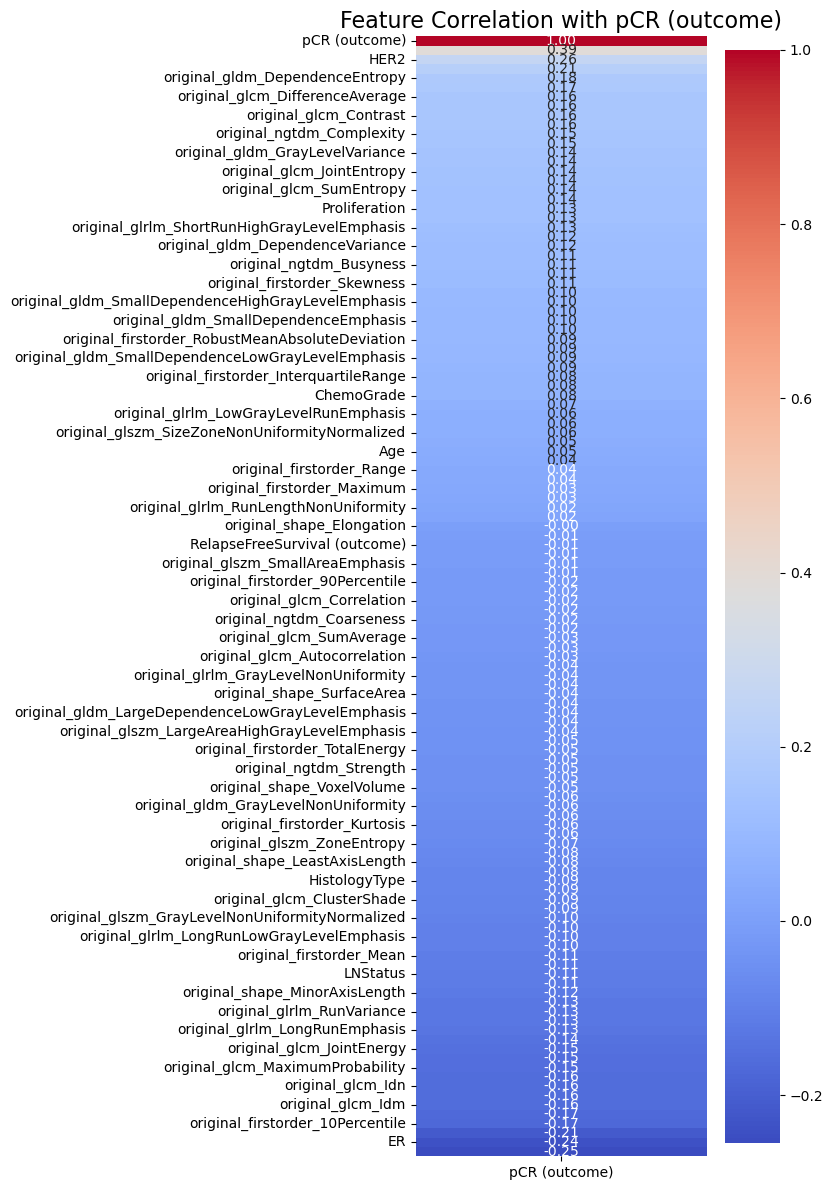

In [14]:
# Create a heatmap to visualize correlation specifically with the target

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Feature Correlation with {target}", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
# Combine correlation and NaN count
feature_stats = pd.DataFrame({
    'Correlation': correlation_with_target[target],
})

# Select features with positive correlation in the range [0.15, 0.5]
selected_positive_features = feature_stats[
    (feature_stats['Correlation'] >= 0.17) & 
    (feature_stats['Correlation'] <= 0.5)
]

# Select features with negative correlation in the range [-0.25, -0.15]
selected_negative_features = feature_stats[
    (feature_stats['Correlation'] >= -0.25) & 
    (feature_stats['Correlation'] <= -0.17)
]

# Combine the selected positive and negative features
selected_features = pd.concat([selected_positive_features, selected_negative_features])

# Display the selected features
print("Selected Features:")
print(selected_features)
print(len(selected_features))

Selected Features:
                                                 Correlation
Gene                                                0.389101
HER2                                                0.264050
original_glrlm_RunPercentage                        0.212037
original_gldm_DependenceEntropy                     0.181219
original_glrlm_RunLengthNonUniformityNormalized     0.174529
original_firstorder_10Percentile                   -0.171387
original_gldm_LargeDependenceEmphasis              -0.211040
ER                                                 -0.237038
8


In [16]:
# Check for missing values
# List of features extracted from the table
features_selected = [
    "Gene",
    "HER2",
    "original_glrlm_RunPercentage",
    "original_gldm_DependenceEntropy",
    "original_glrlm_RunLengthNonUniformityNormalized",
    "original_firstorder_10Percentile",
    "original_gldm_LargeDependenceEmphasis",
    "ER",
    "pCR (outcome)"
]

# Keep only the columns specified in features_x
train_set = train_set[features_selected]

# Display the updated train_set
print(train_set.head())

missing_values_x = train_set[features_selected].isnull().sum()
missing_values_x


     Gene  HER2  original_glrlm_RunPercentage  \
31    0.0     0                      0.154365   
139   1.0     0                      0.166838   
73    0.0     0                      0.138497   
340   0.0     0                      0.094413   
45    0.0     0                      0.129935   

     original_gldm_DependenceEntropy  \
31                          3.622847   
139                         3.296717   
73                          3.027713   
340                         2.363283   
45                          2.949431   

     original_glrlm_RunLengthNonUniformityNormalized  \
31                                          0.079775   
139                                         0.161847   
73                                          0.075577   
340                                         0.049745   
45                                          0.072970   

     original_firstorder_10Percentile  original_gldm_LargeDependenceEmphasis  \
31                           0.299255          

Gene                                               72
HER2                                                0
original_glrlm_RunPercentage                        0
original_gldm_DependenceEntropy                     0
original_glrlm_RunLengthNonUniformityNormalized     0
original_firstorder_10Percentile                    0
original_gldm_LargeDependenceEmphasis               0
ER                                                  0
pCR (outcome)                                       4
dtype: int64

In [17]:
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# สร้าง KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# เติมค่าที่หายไปใน train set
imputed_train = knn_imputer.fit_transform(train_set)

# ปัดค่าที่เติมให้เป็น 0 หรือ 1
imputed_train = np.round(imputed_train)

# แปลงกลับเป็น DataFrame
imputed_train_set = pd.DataFrame(imputed_train, columns=train_set.columns)

# แสดงผลลัพธ์
print("Train Data After Imputation:")
print(imputed_train_set)

imputed_train_set.isnull().sum()

import pickle

# Save the KNNImputer instance
with open("knn_imputer.pkl", "wb") as file:
    pickle.dump(knn_imputer, file)

# Save the processed `imputed_train_set` DataFrame
with open("imputed_train_set.pkl", "wb") as file:
    pickle.dump(imputed_train_set, file)

print("KNNImputer and imputed_train_set saved successfully!")



Train Data After Imputation:
     Gene  HER2  original_glrlm_RunPercentage  \
0     0.0   0.0                           0.0   
1     1.0   0.0                           0.0   
2     0.0   0.0                           0.0   
3     0.0   0.0                           0.0   
4     0.0   0.0                           0.0   
..    ...   ...                           ...   
315   0.0   0.0                           0.0   
316   1.0   0.0                           0.0   
317   0.0   0.0                           0.0   
318   0.0   1.0                           0.0   
319   0.0   0.0                           0.0   

     original_gldm_DependenceEntropy  \
0                                4.0   
1                                3.0   
2                                3.0   
3                                2.0   
4                                3.0   
..                               ...   
315                              2.0   
316                              3.0   
317                   

### CatBoost can effectively handle outliers due to its nature as a tree-based algorithm. Tree-based models, including CatBoost, are inherently robust to outliers because they use splits in decision trees

In [18]:
# # List of features to check for outlier
# features_selected = [
#     "Gene",
#     "HER2",
#     "original_glrlm_RunPercentage",
#     "original_gldm_DependenceEntropy",
#     "original_glrlm_RunLengthNonUniformityNormalized",
#     "original_firstorder_10Percentile",
#     "original_gldm_LargeDependenceEmphasis",
#     "ER",
#     "pCR (outcome)"
# ]
# # Initial number of rows
# initial_rows = imputed_train_set.shape[0]

# # Loop through each feature to detect and remove outliers
# for feature in features_selected:
#     if feature in imputed_train_set.columns:  # Ensure the feature exists in the DataFrame
#         # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range)
#         Q1 = imputed_train_set[feature].quantile(0.25)
#         Q3 = imputed_train_set[feature].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define lower and upper bounds for detecting outliers
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Identify rows that are outliers
#         outliers = imputed_train_set[(imputed_train_set[feature] < lower_bound) | (imputed_train_set[feature] > upper_bound)].index

#         # Drop rows containing outliers
#         imputed_train_set = imputed_train_set.drop(index=outliers)

# # Number of rows after removing outliers
# remaining_rows = imputed_train_set.shape[0]

# # Display the number of rows before and after removing outliers
# print(f"Initial number of rows: {initial_rows}")
# print(f"Number of rows after removing outliers: {remaining_rows}")
# print(f"Number of rows removed: {initial_rows - remaining_rows}")

# # Preview the first few rows of the cleaned DataFrame
# print(imputed_train_set.head())

# # Check the number of rows and columns remaining
# print(imputed_train_set.shape)
# # using most  22 feature --> Number of rows removed: 105
# # using most  16 feature --> Number of rows removed: 69.
# # using most  11 feature --> Number of rows removed: 71.
# # using most  13 feature --> Number of rows removed: 117.
# # using most  8 feature --> Number of rows removed: 71.


In [19]:
# Filter only rows where 'pCR (outcome)' is 0 or 1
final_df = imputed_train_set[imputed_train_set['pCR (outcome)'].isin([0, 1])]
# Count the frequency of each unique value
value_counts = final_df['pCR (outcome)'].value_counts()
print("\nValue counts in 'pCR (outcome)' after filtering:")
print(value_counts)


Value counts in 'pCR (outcome)' after filtering:
0.0    253
1.0     67
Name: pCR (outcome), dtype: int64


In [20]:
# Install the imbalanced-learn library if not already installed
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your DataFrame is named final_df
# Separate features (X) and target (y)
X = final_df.drop(columns=["pCR (outcome)"])  # Features: all columns except the target
y = final_df["pCR (outcome)"]  # Target: the column to balance

# Use SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the result after applying SMOTE
print("Before balancing:")
print(y.value_counts())
print("\nAfter balancing:")
print(pd.Series(y_resampled).value_counts())

# Optional: Create a new DataFrame with the balanced data
final_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=["pCR (outcome)"])], axis=1)

# Display the first few rows of the balanced dataset
print(final_df.head())


# Save the train_dataset to a pickle file
with open("train_dataset.pkl", "wb") as file:
    pickle.dump(final_df, file)

print("Balanced dataset saved successfully!")

# Save the SMOTE object to a pickle file
with open("smote_object.pkl", "wb") as file:
    pickle.dump(smote, file)

print("SMOTE object saved successfully!")



Before balancing:
0.0    253
1.0     67
Name: pCR (outcome), dtype: int64

After balancing:
1.0    253
0.0    253
Name: pCR (outcome), dtype: int64
   Gene  HER2  original_glrlm_RunPercentage  original_gldm_DependenceEntropy  \
0   0.0   0.0                           0.0                              4.0   
1   1.0   0.0                           0.0                              3.0   
2   0.0   0.0                           0.0                              3.0   
3   0.0   0.0                           0.0                              2.0   
4   0.0   0.0                           0.0                              3.0   

   original_glrlm_RunLengthNonUniformityNormalized  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   original_firstorder_10Percentile  original_

In [21]:
X_train_all = final_df.drop(columns=['pCR (outcome)'])  
y_train_all = final_df['pCR (outcome)']  

In [22]:
# XGBoost model
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
# model
model = XGBClassifier(eval_metric='logloss')

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X_train_all, y_train_all, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")

Cross-Validation Accuracy Scores: [0.82352941 0.9009901  0.84158416 0.78217822 0.83168317]
Mean Accuracy: 0.8360
Standard Deviation: 0.0383


In [23]:
# AdaBoost model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# model
model = AdaBoostClassifier(n_estimators=50,algorithm='SAMME', random_state=42)  # กำหนดจำนวน estimators

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X_train_all, y_train_all, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")


Cross-Validation Accuracy Scores: [0.78431373 0.88118812 0.86138614 0.82178218 0.83168317]
Mean Accuracy: 0.8361
Standard Deviation: 0.0334


In [24]:
# CatBoost
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)  # Verbose=0 เพื่อปิด log

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X_train_all, y_train_all, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")


Cross-Validation Accuracy Scores: [0.83333333 0.91089109 0.88118812 0.8019802  0.84158416]
Mean Accuracy: 0.8538
Standard Deviation: 0.0381


In [25]:
### LightGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
 
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X_train_all, y_train_all, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")


[LightGBM] [Info] Number of positive: 196, number of negative: 208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485149 -> initscore=-0.059423
[LightGBM] [Info] Start training from score -0.059423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [26]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Outer loop: k-fold cross-validation on Train set
outer_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
outer_scores = []

# Start Nested Cross-Validation on Train set
for train_idx, val_idx in outer_kfold.split(X_train_all, y_train_all):
    # Split the Train set into outer Train and Validation sets
    X_train_outer, X_val_outer = X_train_all.iloc[train_idx], X_train_all.iloc[val_idx]
    y_train_outer, y_val_outer = y_train_all.iloc[train_idx], y_train_all.iloc[val_idx]
    
    # Inner loop: 5-fold cross-validation for hyperparameter tuning
    inner_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    model = CatBoostClassifier(random_state=42, verbose=0)  # Suppress training output
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_kfold, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_outer, y_train_outer)  # Perform grid search with 5-fold CV
    
    # Select the best model from inner loop
    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val_outer)
    score = accuracy_score(y_val_outer, y_val_pred)
    outer_scores.append(score)  # Append accuracy score for outer fold
    
    print(f"Best Params (Outer Fold): {grid_search.best_params_}")
    print(f"Validation Accuracy (Outer Fold): {score:.4f}")

# Display results from Nested CV on Train set
print(f"Nested CV Accuracy Scores (Train Set): {outer_scores}")
print(f"Mean Accuracy (Train Set): {np.mean(outer_scores):.4f}")
print(f"Standard Deviation (Train Set): {np.std(outer_scores):.4f}")

# # Evaluate the best model on Test set
# final_model = grid_search.best_estimator_  # Use the best model from Nested CV
# final_model.fit(X_train_all, y_train_all)  # Retrain the model on the entire Train set
# y_test_pred = final_model.predict(X_test_all)
# test_accuracy = accuracy_score(y_test_all, y_test_pred)

# print(f"\nTest Set Accuracy: {test_accuracy:.4f}")


Best Params (Outer Fold): {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Validation Accuracy (Outer Fold): 0.8235
Best Params (Outer Fold): {'depth': 8, 'iterations': 100, 'learning_rate': 0.2}
Validation Accuracy (Outer Fold): 0.9406
Best Params (Outer Fold): {'depth': 8, 'iterations': 100, 'learning_rate': 0.2}
Validation Accuracy (Outer Fold): 0.8812
Best Params (Outer Fold): {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Validation Accuracy (Outer Fold): 0.8416
Best Params (Outer Fold): {'depth': 6, 'iterations': 100, 'learning_rate': 0.2}
Validation Accuracy (Outer Fold): 0.8218
Nested CV Accuracy Scores (Train Set): [0.8235294117647058, 0.9405940594059405, 0.8811881188118812, 0.8415841584158416, 0.8217821782178217]
Mean Accuracy (Train Set): 0.8617
Standard Deviation (Train Set): 0.0449


In [27]:
# Define the parameter grid for hyperparameter tuning in the inner loop
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

best_params = {'depth': 8, 'iterations': 100, 'learning_rate': 0.2}

# Outer Loop= (k-fold cross-validation)
outer_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
outer_scores = []

# Start Nested Cross-Validation on Train set
for train_idx, val_idx in outer_kfold.split(X_train_all, y_train_all):
    # Split the Train set into outer Train and Validation sets
    X_train_outer, X_val_outer = X_train_all.iloc[train_idx], X_train_all.iloc[val_idx]
    y_train_outer, y_val_outer = y_train_all.iloc[train_idx], y_train_all.iloc[val_idx]
    
    
    # Create a CatBoost model with predefined parameters
    model = CatBoostClassifier(
        depth=best_params['depth'],
        iterations=best_params['iterations'],
        learning_rate=best_params['learning_rate'],
        random_state=42,
        verbose=0
    )
    
    # Train model
    model.fit(X_train_outer, y_train_outer)
    
    # predict Test Set 
    y_pred = model.predict(X_val_outer)
    score = accuracy_score(y_val_outer, y_pred)
    outer_scores.append(score)
    
    print(f"Outer Fold Test Accuracy: {score:.4f}")

# Final Results
print(f"Nested Cross-Validation Accuracy Scores: {outer_scores}")
print(f"Mean Accuracy: {np.mean(outer_scores):.4f}")
print(f"Standard Deviation: {np.std(outer_scores):.4f}")

Outer Fold Test Accuracy: 0.8039
Outer Fold Test Accuracy: 0.9406
Outer Fold Test Accuracy: 0.8812
Outer Fold Test Accuracy: 0.8218
Outer Fold Test Accuracy: 0.8119
Nested Cross-Validation Accuracy Scores: [0.803921568627451, 0.9405940594059405, 0.8811881188118812, 0.8217821782178217, 0.8118811881188119]
Mean Accuracy: 0.8519
Standard Deviation: 0.0520


In [28]:
from catboost import CatBoostClassifier

# บันทึกโมเดลในฟอร์แมต .cbm
model.save_model("catboost_model_final3.cbm")

# บันทึกโมเดลในฟอร์แมต .json
model.save_model("catboost_model_final3.json", format="json")

In [29]:
import pickle

# Load the SMOTE object
with open("smote_object.pkl", "rb") as file:
    smote = pickle.load(file)
    print("SMOTE object loaded successfully!")

# Load the KNNImputer instance
with open("knn_imputer.pkl", "rb") as file:
    knn_imputer = pickle.load(file)
    print("KNNImputer loaded successfully!")


SMOTE object loaded successfully!
KNNImputer loaded successfully!


In [30]:
features_selected = [
    "Gene",
    "HER2",
    "original_glrlm_RunPercentage",
    "original_gldm_DependenceEntropy",
    "original_glrlm_RunLengthNonUniformityNormalized",
    "original_firstorder_10Percentile",
    "original_gldm_LargeDependenceEmphasis",
    "ER",
    "pCR (outcome)"
]

# Using test set
test_set = pd.concat([X_test_all, y_test_all], axis=1)
test_set.replace(999, np.nan, inplace=True)

# Keep only the columns specified in features_x
test_set_correlation = test_set[features_selected]

# KNN
test_set_imputed = knn_imputer.transform(test_set_correlation)
imputed_train = np.round(imputed_train)
test_set_imputed = pd.DataFrame(test_set_imputed, columns=test_set_correlation.columns)
test_set_imputed 


,Gene,HER2,original_glrlm_RunPercentage,original_gldm_DependenceEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_firstorder_10Percentile,original_gldm_LargeDependenceEmphasis,ER,pCR (outcome)
0,0.0,1.0,0.183315,3.495359,0.106155,0.380737,529.032253,1.0,0.0
1,0.0,0.0,0.197246,3.513201,0.146772,0.111595,522.651075,0.0,0.0
2,1.0,0.0,0.212942,3.725421,0.161884,-0.090141,505.638323,0.0,1.0
3,0.0,1.0,0.142058,3.607752,0.077107,-0.867045,567.814651,1.0,1.0
4,1.0,1.0,0.146954,2.989220,0.115693,0.286341,571.704292,1.0,0.0
...,...,...,...,...,...,...,...,...,...
75,0.2,1.0,0.224699,3.924656,0.125972,0.434541,484.485233,1.0,0.0
76,1.0,0.0,0.182637,3.262911,0.187371,-0.113962,539.702002,0.0,0.0
77,1.0,0.0,0.143612,3.193251,0.073874,0.674164,565.243358,0.0,0.0
78,1.0,1.0,0.178164,3.408131,0.103882,0.598678,534.893631,1.0,1.0


In [31]:
final_test_set_df = test_set_imputed [test_set_imputed ['pCR (outcome)'].isin([0, 1])]
# Count the frequency of each unique value
value_counts = final_test_set_df ['pCR (outcome)'].value_counts()
print("\nValue counts in 'pCR (outcome)' after filtering:")
print(value_counts)


Value counts in 'pCR (outcome)' after filtering:
0.0    62
1.0    17
Name: pCR (outcome), dtype: int64


In [32]:
import pickle
import pandas as pd
from imblearn.over_sampling import SMOTE

# Step 1: โหลด SMOTE object
with open("smote_object.pkl", "rb") as file:
    smote = pickle.load(file)
print("SMOTE object loaded successfully!")

# Step 2: เตรียมข้อมูล Features และ Target
X = final_test_set_df.drop(columns=["pCR (outcome)"])  # Features
y = final_test_set_df ["pCR (outcome)"]  # Target

# Step 3: ใช้ SMOTE เพื่อปรับสมดุลข้อมูล
X_test_resampled, y_test_resampled = smote.fit_resample(X, y)
print("Before balancing:")
print(y.value_counts())
print("\nAfter balancing:")
print(pd.Series(y_test_resampled).value_counts())

# Optional: Create a new DataFrame with the balanced data
final_test_set_df = pd.concat([pd.DataFrame(X_test_resampled), pd.DataFrame(y_test_resampled, columns=["pCR (outcome)"])], axis=1)




SMOTE object loaded successfully!
Before balancing:
0.0    62
1.0    17
Name: pCR (outcome), dtype: int64

After balancing:
0.0    62
1.0    62
Name: pCR (outcome), dtype: int64


In [33]:
X_test_all_clean = final_test_set_df .drop(columns=['pCR (outcome)'])  
y_test_all_clean = final_test_set_df ['pCR (outcome)']  

# model
model = CatBoostClassifier()
model.load_model("catboost_model_final3.cbm")

# Predict
y_pred = model.predict(X_test_all_clean)

# Result
print("Accuracy:", accuracy_score(y_test_all_clean, y_pred))


Accuracy: 0.7580645161290323


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report (Precision, Recall, F1-Score, etc.)
report = classification_report(y_test_all_clean, y_pred)

# Print the classification report
print(report)

# Confusion matrix
cm = confusion_matrix(y_test_all_clean, y_pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        62
         1.0       0.74      0.81      0.77        62

    accuracy                           0.76       124
   macro avg       0.76      0.76      0.76       124
weighted avg       0.76      0.76      0.76       124

Confusion Matrix:
[[44 18]
 [12 50]]


In [35]:
from sklearn.metrics import balanced_accuracy_score

# คำนวณ Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test_all_clean, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.7580645161290323
